In [1]:
# Import necessary libraries
import numpy as np  # import library for working with arrays and matrices
import cv2  # import library for image processing
import matplotlib.pyplot as plt  # import library for plotting
import mahotas # imort library for image processing
from pyfeats import *

# FirstOrder_Features
Parameters
----------
* f : numpy ndarray
    Image of dimensions N1 x N2.
* mask : numpy ndarray
    Mask image N1 x N2 with 1 if pixels belongs to ROI, 0 else. Give None
    if you want to consider ROI the whole image.

Returns
-------
[features : numpy ndarray]
[labels : list - Labels of features]

1. Mean: The average value of all pixel intensities in the image.
$$\frac{1}{N} \sum_{i=1}^{N} x_i$$


2. Variance: A measure of how spread out the pixel intensities are in the image. It is calculated by subtracting the mean from each pixel intensity value, squaring the differences, and then averaging the squared differences.
$$\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2$$, where $\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$


3. Median (50-Percentile): The middle value of all pixel intensities in the image when they are sorted in order.


4. Mode: The most frequently occurring pixel intensity value in the image.
$$\frac{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^3}{\sigma^3}$$


5. Skewness: A measure of the degree of asymmetry of the pixel intensity distribution in the image. Positive skewness means the distribution is skewed to the right, while negative skewness means it is skewed to the left. 
$$\frac{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^3}{\sigma^3}$$, where $\mu$ and $\sigma$ are the mean and standard deviation of the pixel intensity distribution, respectively.


6. Kurtosis: A measure of the degree of peakedness of the pixel intensity distribution in the image. High kurtosis values indicate a sharp peak and heavy tails in the distribution, while low values indicate a flat peak and light tails.
$$\frac{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^4}{\sigma^4}$$, where $\mu$ and $\sigma$ are the mean and standard deviation of the pixel intensity distribution, respectively.


7. Energy: The sum of the squared pixel intensities in the image.
$$\sum_{i=1}^{N} x_i^2$$


8. Entropy: A measure of the amount of information contained in the pixel intensity distribution in the image. High entropy values indicate a more uniform distribution, while low values indicate a more peaked distribution.
$$-\sum_{i=1}^{N} p(x_i) \log_2 p(x_i)$$, where $p(x_i)$ is the probability of the i-th pixel intensity value.


9. Minimal Gray Level: The smallest pixel intensity value in the image. 
$$min(x_i)$$


10. Maximal Gray Level: The largest pixel intensity value in the image. 
$$max(x_i)$$


11. Coefficient of Variation: The ratio of the standard deviation to the mean of the pixel intensity distribution in the image.
$$\frac{\sigma}{\mu}$$, where $\mu$ and $\sigma$ are the mean and standard deviation of the pixel intensity distribution, respectively.


12. 10- Percentile: The values that divide the pixel intensity distribution into 10% of the data.
13. 25- Percentile: The values that divide the pixel intensity distribution into 25% of the data.
14. 75- Percentile: The values that divide the pixel intensity distribution into 75% of the data.
15. 90- Percentile: The values that divide the pixel intensity distribution into 90% of the data.

The $p$th percentile is the value at index $$i = \lceil \frac{p}{100} N \rceil$$, where $\lceil x \rceil$ denotes the smallest integer greater than or equal to $x$.
If $i$ is not an integer, interpolate between $x_{\lfloor i \rfloor}$ and $x_{\lfloor i \rfloor + 1}$ as follows:
$$x_p = x_{\lfloor i \rfloor} + (i - \lfloor i \rfloor)(x_{\lfloor i \rfloor + 1} - x_{\lfloor i \rfloor})$$.
Note that the 50th percentile is equivalent to the median.


16. Histogram width: The range between the smallest and largest pixel intensity values in the image.
$$w = max(x_i) - min(x_i)$$, where $x_i$ represents the pixel intensity values in the image.

# GLCM_Features (Gray Level Co-occurrence Matrix)

Parameters
----------
* f : numpy ndarray
    Image of dimensions N1 x N2.
* ignore_zeros : int, optional
    Ignore zeros in image f. The default is True.
Returns
-------
[features_mean : numpy ndarray]
[features_range : numpy ndarray-
    Haralick's features, same as before but range]
[labels_mean : list-
    Labels of features_mean.]
[labels_range: list
    Labels of features_range.]
1. Angular Second Moment: Also known as uniformity or energy, this measures the distribution of gray-level values in the image. It is calculated as the sum of squared elements in the GLCM:
$$\sum_{i,j} p_{i,j}^2$$


2. Contrast: This measures the local variations in the gray-level intensity. It is calculated as the sum of the squared differences between each element in the GLCM and the mean intensity value of the GLCM:
$$\sum_{i,j} (i-j)^2 p_{i,j}$$


3. Correlation: This measures the linear relationship between the gray-level values in the image. It is calculated as:
$$\frac{\sum_{i,j}(i - \mu)(j - \mu)p_{i,j}}{\sigma^2}$$ where $\mu$ is the mean gray-level intensity and $\sigma$ is the standard deviation of the gray-level intensities.


4. Sum of Squares: Variance: This measures the variance of the gray-level intensities in the image. It is calculated as:
$$\sum_{i,j} (i - \mu)^2 p_{i,j}$$ where $\mu$ is the mean gray-level intensity.


5. Inverse Difference Moment: This measures the homogeneity or local homogeneity of the gray-level values in the image. It is calculated as:
$$\sum_{i,j} \frac{p_{i,j}}{1 + (i - j)^2}$$


6. Sum Average: This measures the local variations in the gray-level intensity. It is calculated as:
$$\sum_{k=2}^{2N_g} k p_{x+y=k}$$ where $N_g$ is the number of gray levels in the image and $p_{x+y=k}$ is the probability that the sum of the row and column indices of a GLCM element is equal to $k$.


7. Sum Variance: This measures the variance of the sum of the row and column indices of GLCM elements. It is calculated as:
$$\sum_{k=2}^{2N_g} (k - S_{avg})^2 p_{x+y=k}$$ where $S_{avg}$ is the sum average.


8. Sum Entropy: This measures the randomness of the gray-level intensity variations in the image. It is calculated as:
$$-\sum_{k=2}^{2N_g} p_{x+y=k} \log_2(p_{x+y=k} + \epsilon)$$ where $\epsilon$ is a small constant to avoid division by zero.


9. Entropy: This measures the randomness or complexity of the gray-level intensities in the image. It is calculated as:
$$-\sum_{i,j} p_{i,j} \log_2(p_{i,j} + \epsilon)$$ where $\epsilon$ is a small constant to avoid division by zero.


10. Difference Variance: This measures the variance of the differences between the row and column indices of GLCM elements. It is calculated as:
$$\sum_{k=0}^{N_g-1} k^2 p_{|i-j|=k} - D_{avg}^2$$ where $D_{avg}$ is the average difference.


11. Difference Entropy (continued):
$$-\sum_{k=0}^{N_g-1} p_{|i-j|=k} \log_2(p_{|i-j|=k} + \epsilon)$$

where $\epsilon$ is a small constant to avoid division by zero.


12. Information Measure of Correlation 1: This measures the correlation between the gray-level intensities of neighboring pixels in the image. It is calculated as:
$$\frac{\sum_{i,j} p_{i,j}(i - \mu)(j - \mu)}{\sigma_i \sigma_j}$$

where $\mu$ is the mean gray-level intensity, $\sigma_i$ and $\sigma_j$ are the standard deviations of the gray-level intensities along the rows and columns, respectively.


13. Information Measure of Correlation 2: This measures the correlation between the gray-level intensities of neighboring pixels in the image. It is calculated as:
$$\sqrt{\sum_{i,j} \frac{(i - \mu)^2 p_{i,j}}{\sigma_i^2} + \frac{(j - \mu)^2 p_{i,j}}{\sigma_j^2}}$$

where $\mu$ is the mean gray-level intensity, $\sigma_i$ and $\sigma_j$ are the standard deviations of the gray-level intensities along the rows and columns, respectively.


14. Maximal Correlation Coefficient: This measures the maximal correlation coefficient between the gray-level intensities of neighboring pixels in the image. It is calculated as:
$$\max_{i,j} \frac{p_{i,j}}{\sqrt{p_i p_j}}$$

where $p_i$ and $p_j$ are the marginal probabilities of the row and column sums, respectively.

In [24]:
import glob
def load_image(arr):
    strr = "wool/*.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

def grayscaling(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

In [25]:
data=[]
data=load_image(data)
wool_images = grayscaling(data)

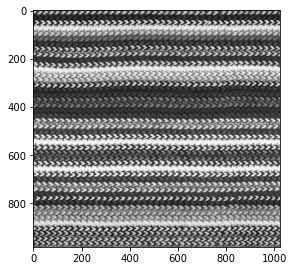

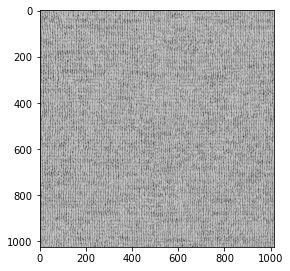

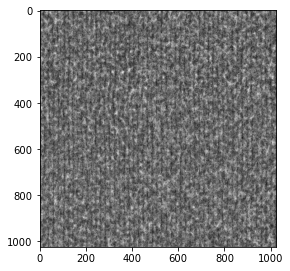

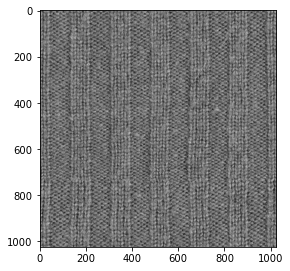

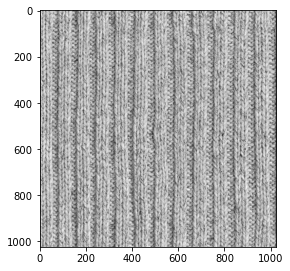

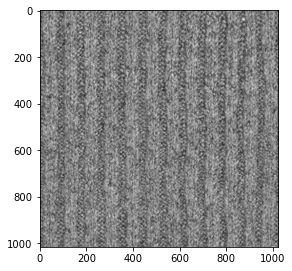

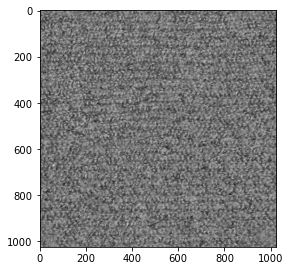

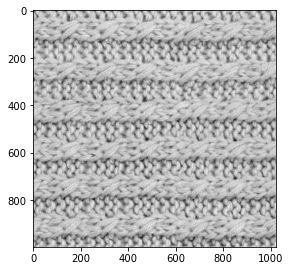

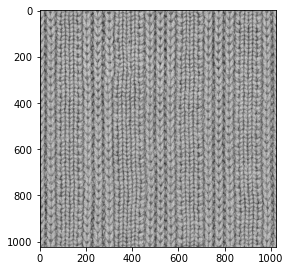

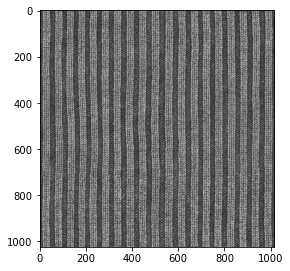

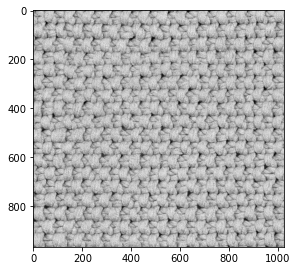

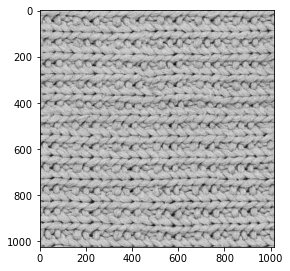

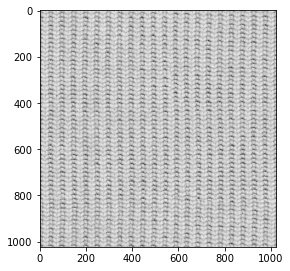

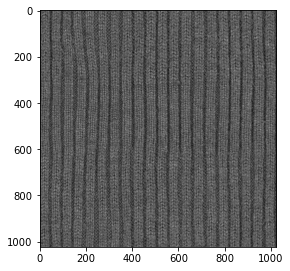

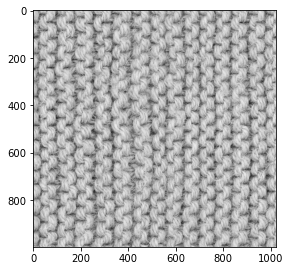

In [26]:
for i, image in enumerate(wool_images):
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(4,2,2)
    ax1.imshow(image, cmap=plt.cm.gray)

In [49]:
import pandas as pd
df = pd.DataFrame({'Parsing': labels})

In [51]:
df.head(16)

,Parsing,Image_1,Image_2,Image_3,Image_4,Image_5,Image_6,Image_7,Image_8,Image_9,Image_10,Image_11,Image_12,Image_13,Image_14,Image_15
0,Mean,120.787693,176.863796,103.064780,106.306278,138.198450,114.048271,113.980272,195.455536,139.085751,102.117681,151.934200,156.773373,151.858904,84.252775,167.946474
1,Variance,4561.825744,820.573661,923.066215,588.980076,783.939743,615.812616,618.704594,506.221988,844.070295,2144.813350,982.134541,1160.604764,541.186441,702.105093,1053.704259
2,Median,101.000000,185.000000,102.000000,107.000000,142.000000,114.000000,114.000000,200.000000,141.000000,93.000000,158.000000,165.000000,157.000000,84.000000,174.000000
3,Mode,58.000000,200.000000,101.000000,112.000000,157.000000,114.000000,113.000000,209.000000,151.000000,74.000000,170.000000,179.000000,164.000000,86.000000,191.000000
4,Skewness,0.453657,-1.253454,0.145937,-0.173110,-0.621617,-0.141211,-0.165844,-1.201720,-0.442007,0.621040,-1.337444,-1.420446,-1.490192,0.001830,-0.912265
5,Kurtosis,1.788993,4.018987,2.699504,2.718571,2.763709,2.610438,2.643410,4.187877,2.698522,2.716823,5.244188,4.983438,5.646432,2.813056,3.366723
6,Energy,0.005535,0.013538,0.009222,0.011582,0.010532,0.011187,0.011185,0.015586,0.009763,0.006547,0.011042,0.011111,0.015734,0.010634,0.009841
7,Entropy,5.339889,4.559860,4.838048,4.614614,4.701655,4.636672,4.638982,4.402493,4.773175,5.184048,4.733361,4.756080,4.395205,4.706122,4.804045
8,MinimalGrayLevel,7.000000,49.000000,11.000000,24.000000,22.000000,20.000000,22.000000,83.000000,23.000000,0.000000,0.000000,1.000000,14.000000,0.000000,19.000000
9,MaximalGrayLevel,255.000000,246.000000,229.000000,215.000000,201.000000,211.000000,227.000000,244.000000,221.000000,253.000000,222.000000,234.000000,197.000000,251.000000,239.000000


In [27]:
labels = ["Mean","Variance","Median","Mode","Skewness",
              "Kurtosis","Energy","Entropy","MinimalGrayLevel",
              "MaximalGrayLevel","CoefficientOfVariation",
              "10Percentile","25Percentile","75Percentile",
              "90Percentile","HistogramWidth"]

In [50]:
#%% A1. Texture features
for i, image in enumerate(wool_images):
    first_order_features = {}
    first_order_features['A_FOS'] = firstorder_features(image,None)
    df["Image_" + str(i+1)] = first_order_features['A_FOS'][0]

In [53]:
labels = ["ASM", "Contrast", "Correlation",
              "SumOfSquaresVariance", "InverseDifferenceMoment",
               "SumAverage", "SumVariance", "SumEntropy",
               "Entropy", "DifferenceVariance",
               "DifferenceEntropy", "Information1",
               "Information2", "MaximalCorrelationCoefficient"]

In [91]:
import pandas as pd
df = pd.DataFrame({'Parsing': labels})

In [92]:
for i, image in enumerate(wool_images):
    second_order_features = {}
    second_order_features['A_GLCM'] = glcm_features(image, ignore_zeros=True)
    df["Image_" + str(i+1)] = second_order_features['A_GLCM'][0]

In [73]:
df.head(16)

,Parsing,Image_1,Image_2,Image_3,Image_4,Image_5,Image_6,Image_7,Image_8,Image_9,Image_10,Image_11,Image_12,Image_13,Image_14,Image_15
0,ASM,0.000124,0.000320,0.000114,0.000206,0.000260,0.000207,0.000197,0.000761,0.000161,0.000073,0.000237,0.000253,0.000571,0.000155,0.000255
1,Contrast,529.950141,505.506940,628.925949,315.120076,219.004116,278.761094,312.391930,64.853353,384.731766,1064.486858,280.431803,294.569116,146.132240,476.529893,245.001268
2,Correlation,0.941714,0.690649,0.657964,0.731386,0.859771,0.772697,0.746520,0.935637,0.771140,0.750892,0.856487,0.872506,0.864326,0.659142,0.883287
3,SumOfSquaresVariance,4545.812264,817.006978,919.379423,586.559360,780.841038,613.196042,616.198314,503.794928,840.533741,2136.541002,977.083453,1155.304250,538.533433,699.037004,1049.559395
4,InverseDifferenceMoment,0.097323,0.079712,0.050154,0.073620,0.103484,0.078350,0.074301,0.181028,0.069036,0.044940,0.086052,0.088720,0.138619,0.059502,0.103931
5,SumAverage,240.661920,352.332479,205.335442,211.788736,275.329783,227.217801,227.065903,389.378392,277.088127,203.476131,302.726532,312.344927,302.537385,167.877738,334.556782
6,SumVariance,17653.298914,2762.520972,3048.591744,2031.117366,2904.360035,2174.023072,2152.401326,1950.326360,2977.403198,7481.677150,3627.902008,4326.647883,2008.001491,2319.618122,3953.236311
7,SumEntropy,8.665380,7.459263,7.822517,7.531677,7.712169,7.581675,7.575320,7.302660,7.771682,8.368155,7.739854,7.776795,7.269448,7.632395,7.868564
8,Entropy,13.758690,12.566949,13.474546,12.691745,12.483129,12.647394,12.722069,11.183724,13.030186,14.252470,12.716087,12.734598,11.610280,13.081044,12.659606
9,DifferenceVariance,0.000122,0.000112,0.000080,0.000131,0.000192,0.000143,0.000126,0.000306,0.000118,0.000059,0.000146,0.000141,0.000269,0.000090,0.000160
